In [ ]:
#******************************************************MATPLOTLIB***************************************************************
# plt.show() command should be used only once per Python session, 

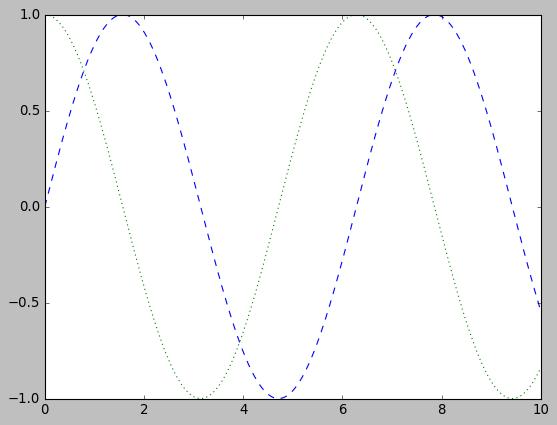

In [10]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('classic')

x=np.linspace(0,10,500)

fig=plt.figure()
plt.plot(x, np.sin(x), '--')
plt.plot(x, np.cos(x), ':')

# fig.savefig('test.png')

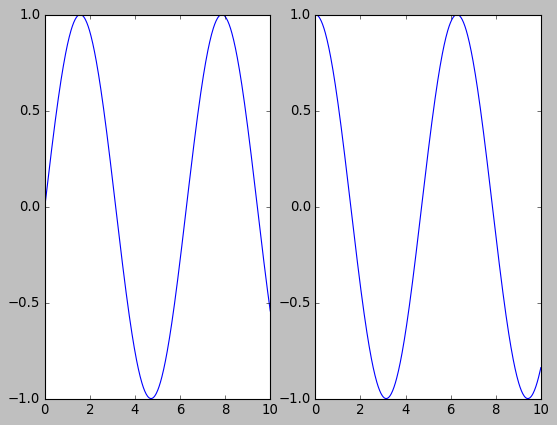

In [13]:
plt.subplot(1,2,1) # 1=row, 2=column, 1=axes number(panel number)
plt.plot(x, np.sin(x))

plt.subplot(1,2,2) # 1=row, 2=column, 2=axes number(panel number)
plt.plot(x, np.cos(x))

- plt.gcf() - get current figure
- plt.gca() - get current axes

- figure (an instance of the class plt.Figure) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. 
- axes (an instance of the class plt.Axes) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

- fig = figure instance
- ax = axes instance or group of axes instances

- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel() 
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()

- or ax.set( xlim, ylim, xlabel, ylabel, title )


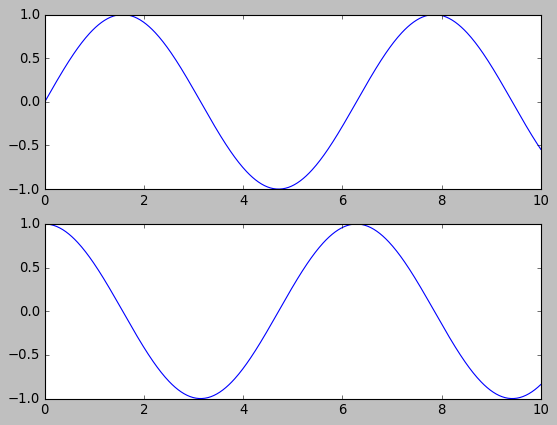

In [19]:
# Object-oriented interface
# the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects

# create a grid of plots:
fig, ax =plt.subplots(2) # ax is an array of two Axes objects

# call plot() method on appropriate object:
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))


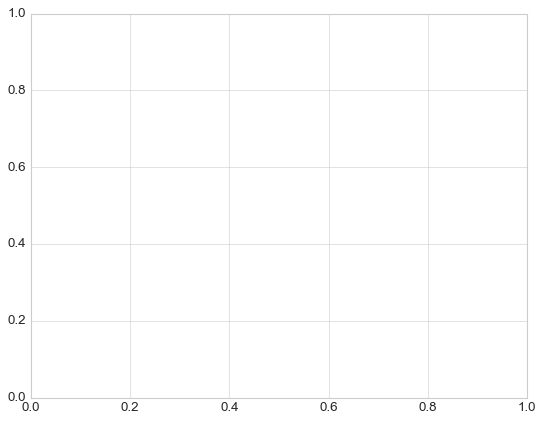

In [21]:
plt.style.use('seaborn-whitegrid')

fig=plt.figure()
ax=plt.axes() # empty grid

(-1.0, 12.0)

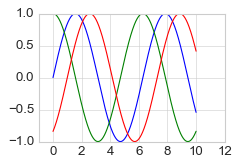

In [39]:
fig=plt.figure(figsize=(3,2))
ax=plt.axes()

x=np.linspace(0,10, 1000)
ax.plot(x, np.sin(x)) # creating multiple lines on one figure: 
ax.plot(x, np.cos(x))
ax.plot(x, np.sin(x-1))
plt.xlim(-1, 12)

(-1.0, 12.0, -2.0, 20.0)

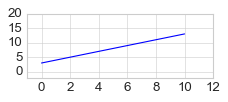

In [45]:
plt.figure(figsize=(3,1))
plt.plot(x, x+3)

#setting axis limits:
plt.xlim(-1, 12)
plt.ylim(-2, 20)

# or by using axis() method [xmin, xmax, ymin, ymax]:
plt.axis([-1, 12, -2, 20])

(10.0, 0.0)

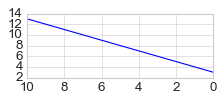

In [43]:
#reverse axis order:
plt.figure(figsize=(3,1))
plt.plot(x, x+3)
plt.xlim(10,0)

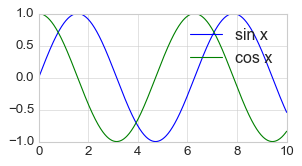

In [52]:
# LABELING PLOTS:
# plot legend that labels each line type:
plt.figure(figsize=(4,2))
plt.plot(x, np.sin(x), label='sin x')
plt.plot(x, np.cos(x), label='cos x')
plt.legend()

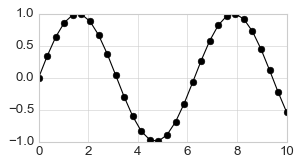

In [63]:
# MARKER: markersize, markerfacecolor, markeredgecolor, markeredgewidth
x=np.linspace(0,10,30)

plt.figure(figsize=(4,2))
plt.plot(x, np.sin(x), marker='o', color='black')

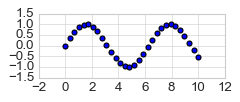

In [67]:
plt.figure(figsize=(3,1))
plt.scatter(x, np.sin(x))

In [68]:
# plt.plot vs plt.scatter: 
# - in the scatter plot the properties of each individual point (size, face color, edge color, etc.) can be 
#individually controlled or mapped to data
# - plt.plot is more efficient : plt.scatter has the capability to render a different size and/or color for each point, 
# so the renderer must do the extra work of constructing each point individually


# - the marker size: plt.plot->markersize=22 = plt.scatter->s=22**2 (in plt.scatter smaller scale, hence feature raised to power or multiplication)

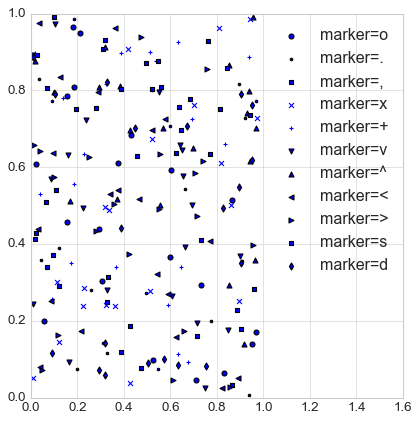

In [82]:
plt.figure(figsize=(6,6))
rng=np.random.RandomState(42)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.scatter(rng.rand(20), rng.rand(20), marker=marker, label='marker={}'.format(marker))
    plt.axis([0, 1.6, 0, 1])
    plt.legend()

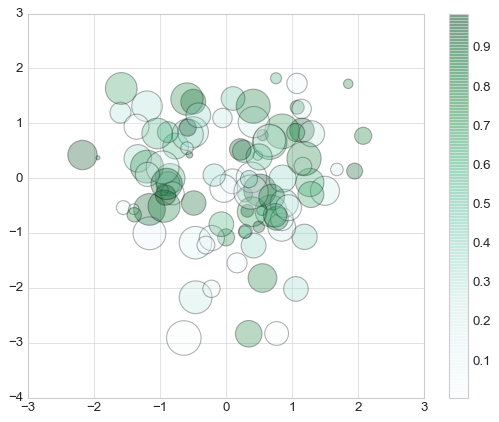

In [101]:
# rand - only positive, randn - positive & negative, first argument - the number of items
plt.scatter(x=rng.randn(100), y=rng.randn(100), c=rng.rand(100), s=rng.rand(100)*1000, cmap='BuGn', alpha=0.3)
plt.colorbar() #show color scale

In [141]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# np.c_ = numpy concatenate
iris=load_iris()
iris=pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names+['species'])
target_names=['setosa', 'versicolor', 'virginica']
iris['names']=iris['species'].replace({i:target_names[i] for i in range(len(target_names))})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


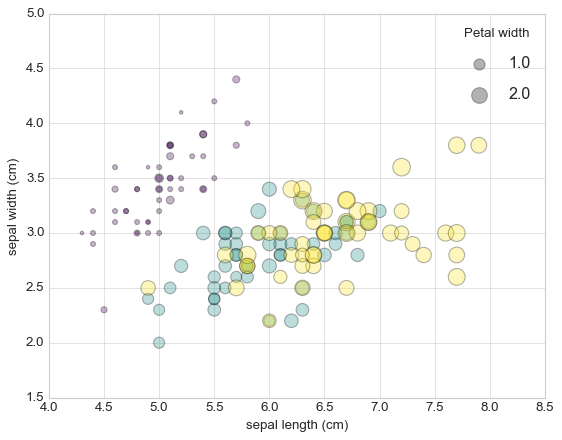

In [263]:
iris2=load_iris()
features=iris2.data.T # Transpose =  reshaping from 150 rows and 4 columns to 4 rows and 150 columns (sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm))
features.shape

plt.scatter(x=features[0], y=features[1], s=100*features[3], c=iris2.target, cmap='viridis', alpha=0.3)
plt.xlabel(iris2.feature_names[0])
plt.ylabel(iris2.feature_names[1])

# adding legend:

for area in np.delete(np.unique(np.around(features[3])),0):
    plt.scatter([], [], c='k', alpha=0.3, s=area*100,
    label=str(area))

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Petal width')

In [259]:
np.around(np.unique(features[3]))
np.unique(np.around(features[3]))

array([0., 1., 2.])

(array([ 12.,  25.,  79., 165., 247., 226., 147.,  69.,  25.,   5.]),
 array([-2.94038863, -2.32703901, -1.71368939, -1.10033977, -0.48699015,
         0.12635947,  0.73970909,  1.35305871,  1.96640833,  2.57975795,
         3.19310757]),
 <BarContainer object of 10 artists>)

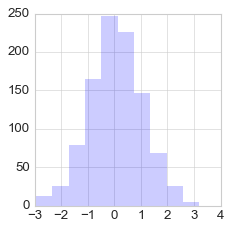

In [269]:
#*******************************************HISTOGRAM:
x=rng.randn(1000)
plt.figure(figsize=(3,3))
plt.hist(x, alpha=0.2, edgecolor='none')

In [241]:
# count the number of points in a given bin:
counts, bin_edges = np.histogram(x, bins=5)
counts

array([ 26, 324, 498, 142,  10], dtype=int64)

In [282]:
from sklearn.datasets import load_digits
digits=load_digits(n_class=6)

iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,names
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


KeyError: 'sepal length (cm)'

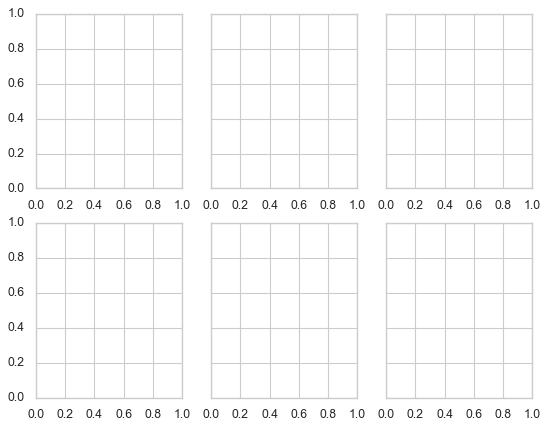

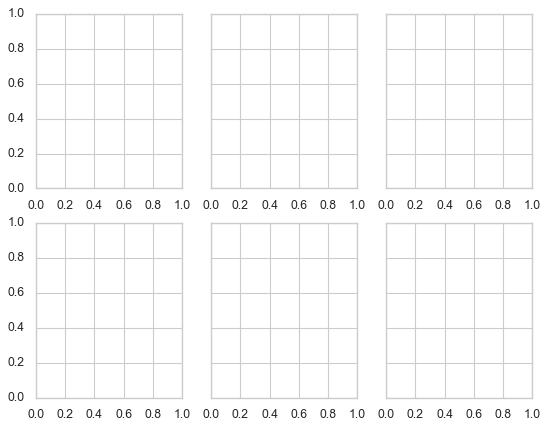

In [324]:
import seaborn as sns
sns.set(style="whitegrid")
col_n=iris._get_numeric_data()
col_n=col_n.columns.tolist()

row=2
col=math.ceil(len(col_n)/row)

fig, ax =plt.subplots(row, col, sharey=True)
# for i in range(row):
#     for j in range(col):
#         if not col_n:
#             continue
#         sns.barplot(data=iris, x='names', y=col_n.pop() , ax=ax[i][j])

# or:
fig, ax =plt.subplots(row, col, sharey=True)
for i, axi in enumerate(ax.flat):
    axi.bar(x='names', height=iris.loc[col_n[i]])

In [321]:
plt.plot?